In [1]:
import pickle
import os

PIK = "claim_and_title.data"

if not os.path.isfile(PIK):
    # Download file
    !wget https://benhoyle.github.io/notebooks/title_generation/claim_and_title.data

with open(PIK, "rb") as f:
    print("Loading data")
    data = pickle.load(f)
    print("{0} samples loaded".format(len(data)))
    
print("\n\nAdding start and stop tokens to output")
data = [(c, "startseq {0} stopseq".format(t)) for c, t in data]
                                      
print("\n\nAn example title:", data[0][1])
print("----")
print("An example claim:", data[0][0])

Loading data
30000 samples loaded


Adding start and stop tokens to output


An example title: startseq System and method for session restoration at geo-redundant gateways stopseq
----
An example claim: 
1. A method for managing a backup service gateway (SGW) associated with a primary SGW, the method comprising:
periodically receiving from the primary SGW at least a portion of corresponding UE session state information, the received portion of session state information being sufficient to enable the backup SGW to indicate to an inquiring management entity that UEs having an active session supported by the primary SGW are in a live state; and
in response to a failure of the primary SGW, the backup SGW assuming management of IP addresses and paths associated with said primary SGW and transmitting a Downlink Data Notification (DDN) toward a Mobility Management Entity (MME) for each of said UEs having an active session supported by the failed primary SGW to detach from the network and reat

In [2]:
from cb_model import CBModel

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
machine = CBModel(
    encoder_texts=[d[0] for d in data],
    decoder_texts=[d[1] for d in data],
    encoder_seq_length=300,
    decoder_seq_length=22,
    num_encoder_tokens=2500,
    num_decoder_tokens=2500,
    latent_dim=128,
    weights_file="class_cbmodel.hdf5",
    training_set_size=5000
)

Fitting tokenizers
Our input data has shape (30000, 300) and our output data has shape (30000, 22)
Generating training and test data
Loading GloVe 100d embeddings from file
Found 400000 word vectors.
Building embedding matrix
Building models for training and inference
Compiling model
Loaded weights


Training for epoch 0
Training on batch 0 to 5000 of 24000
Train on 5000 samples, validate on 1250 samples
Epoch 1/1
5000/5000 [==============================] - 81s 16ms/step - loss: 1.7880 - acc: 0.7019 - val_loss: 1.8243 - val_acc: 0.6996
Training on batch 5000 to 10000 of 24000
Train on 5000 samples, validate on 1250 samples
Epoch 1/1
5000/5000 [==============================] - 86s 17ms/step - loss: 1.7907 - acc: 0.7019 - val_loss: 1.8118 - val_acc: 0.6994
Training on batch 10000 to 15000 of 24000
Train on 5000 samples, validate on 1250 samples
Epoch 1/1
5000/5000 [==============================] - 87s 17ms/step - loss: 1.7373 - acc: 0.7096 - val_loss: 1.7885 - val_acc: 0.7012
Training on batch 15000 to 20000 of 24000
Train on 5000 samples, validate on 1250 samples
Epoch 1/1
5000/5000 [==============================] - 89s 18ms/step - loss: 1.7311 - acc: 0.7062 - val_loss: 1.7668 - val_acc: 0.7025
Training on batch 20000 to 24000 of 24000
Train on 4000 samples, validate on 1000 sam

Training on batch 0 to 5000 of 24000
Train on 5000 samples, validate on 1250 samples
Epoch 1/1
5000/5000 [==============================] - 92s 18ms/step - loss: 1.5693 - acc: 0.7187 - val_loss: 1.6688 - val_acc: 0.7109
Training on batch 5000 to 10000 of 24000
Train on 5000 samples, validate on 1250 samples
Epoch 1/1
5000/5000 [==============================] - 91s 18ms/step - loss: 1.5816 - acc: 0.7177 - val_loss: 1.6653 - val_acc: 0.7100
Training on batch 10000 to 15000 of 24000
Train on 5000 samples, validate on 1250 samples
Epoch 1/1
5000/5000 [==============================] - 90s 18ms/step - loss: 1.5472 - acc: 0.7222 - val_loss: 1.6592 - val_acc: 0.7126
Training on batch 15000 to 20000 of 24000
Train on 5000 samples, validate on 1250 samples
Epoch 1/1
5000/5000 [==============================] - 89s 18ms/step - loss: 1.5465 - acc: 0.7198 - val_loss: 1.6482 - val_acc: 0.7133
Training on batch 20000 to 24000 of 24000
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4

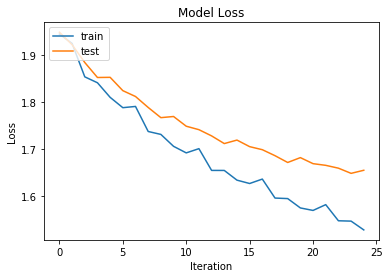

In [5]:
machine.train(epochs=4)